In [78]:
import pandas as pd

# Load your data
df = pd.read_csv('https://raw.githubusercontent.com/H16902/Data/main/TRAINSOC.csv')  # Adjust the filename as necessary


# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'],format='%d-%m-%Y')
start_date = '2015-01-01'
end_date = '2017-12-31'

# Filter the DataFrame
filtered_df = df.loc[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Check the structure of your data
print(df.head())




        date  store  item  sales
0 2013-01-01      1     1     13
1 2013-01-02      1     1     11
2 2013-01-03      1     1     14
3 2013-01-04      1     1     13
4 2013-01-05      1     1     10


In [55]:
from prophet import Prophet
from tqdm import tqdm

# Create a DataFrame to hold forecasts
forecast_results = []

# Loop over each store-item combination
for store in tqdm(filtered_df['store'].unique(), desc='Stores'):
    for item in tqdm(filtered_df['item'].unique(), desc='Items', leave=False):
        # Filter data for the specific store and item
        subset = filtered_df[(filtered_df['store'] == store) & (filtered_df['item'] == item)][['date', 'sales']]
        subset.rename(columns={'date': 'ds', 'sales': 'y'}, inplace=True)
        
        # Fit the Prophet model
        model = Prophet(yearly_seasonality=True, daily_seasonality=False)
        model.fit(subset)
        
        # Create future dataframe for the next 3 months
        future = model.make_future_dataframe(periods=90, freq='D', include_history=False)
        
        # Forecast
        forecast = model.predict(future)
        
        # Store results with store and item identifiers
        forecast['store'] = store
        forecast['item'] = item
        forecast_results.append(forecast[['ds', 'yhat', 'store', 'item']])

# Concatenate all forecasts
forecast_df = pd.concat(forecast_results)
forecast_df.rename(columns={'ds': 'date', 'yhat': 'forecast'}, inplace=True)

# Save results to a CSV file
forecast_df.to_csv('sales_forecast.csv', index=False)




Items:   0%|                                                                                    | 0/50 [00:00<?, ?it/s]14:23:53 - cmdstanpy - INFO - Chain [1] start processing
14:23:53 - cmdstanpy - INFO - Chain [1] done processing

Items:   2%|█▌                                                                          | 1/50 [00:00<00:28,  1.73it/s]14:23:53 - cmdstanpy - INFO - Chain [1] start processing
14:23:53 - cmdstanpy - INFO - Chain [1] done processing

Items:   4%|███                                                                         | 2/50 [00:00<00:22,  2.15it/s]14:23:54 - cmdstanpy - INFO - Chain [1] start processing
14:23:54 - cmdstanpy - INFO - Chain [1] done processing

Items:   6%|████▌                                                                       | 3/50 [00:01<00:19,  2.40it/s]14:23:54 - cmdstanpy - INFO - Chain [1] start processing
14:23:54 - cmdstanpy - INFO - Chain [1] done processing

Items:   8%|██████                                                  

In [67]:
geet=pd.read_csv('sales_forecast.csv')
geet

,date,forecast,store,item
0,2018-01-01,11.867601,1,1
1,2018-01-02,14.887788,1,1
2,2018-01-03,15.340569,1,1
3,2018-01-04,16.043955,1,1
4,2018-01-05,17.559121,1,1
...,...,...,...,...
44995,2018-03-27,70.788371,10,50
44996,2018-03-28,72.235438,10,50
44997,2018-03-29,78.671955,10,50
44998,2018-03-30,83.427006,10,50


In [75]:
s=geet[geet['store']==1]
s=s[s['item']==2]
s['date'] = pd.to_datetime(s['date'])
s.set_index('date',inplace=True)
s

,forecast,store,item
date,,,
2018-01-01,33.731083,1,2
2018-01-02,40.569914,1,2
2018-01-03,41.930999,1,2
2018-01-04,44.904583,1,2
2018-01-05,48.378817,1,2
...,...,...,...
2018-03-27,55.644023,1,2
2018-03-28,57.377930,1,2
2018-03-29,60.739709,1,2


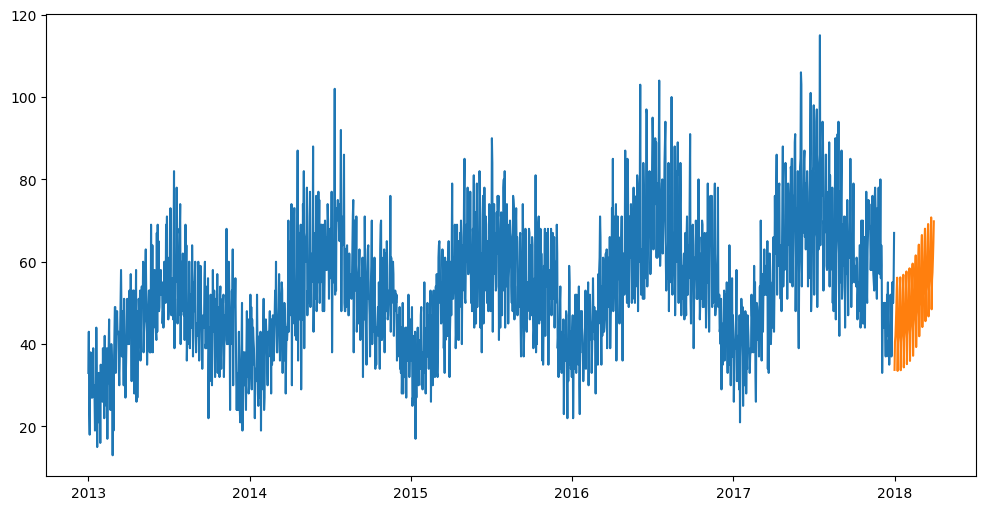

In [79]:
import matplotlib.pyplot as plt
k=df[df['store']==1]
k=k[k['item']==2]
k['date'] = pd.to_datetime(k['date'])
k.set_index('date',inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(k.index, k['sales'], label='Historical Sales')
plt.plot(s.index, s['forecast'], label='Forecast Sales')
# Plot the forecasted sales data

